# Emergency - 911 Calls Data Analysis

!(https://github.com/MariamRashad/911-Data-blog/blob/master/ee280309ac1fb5f24ce3263dafe7fd5c.jpg?raw=true)

### Business understanding

 Before turning the dial, a lot of people across the country had to wait for operator help when calling. Creating an emergency phone number is a good way to connect emergency personnel. The caller of the emergency contact depends on the operator before the emergency number is confirmed. The caller must wait for assistance and tell the operator how many people want to connect. In an emergency, the caller can simply reply to the emergency inservice name to get help.<br>

##### according to some dangerous situations that has happened and the gradual increase of the 911 emergency calls Iam going to discuss the following questions :<br>

1-What are the top 5 townships for 911 calls? <br>
2-What are the most common Reasons for a 911 call ?<br>
3-How many calls does 911 recieve during a month ?<br>

In [80]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config inlinebackend.figure_format = 'retina'
df = pd.read_csv('911.csv')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


### After we had inserted our DataSet let's see what can we do with it ;) 

#### Data Understanding 

What we will need from our dataset are the towns , the date of the calls , The reason for the emergency and the number of calls we also have the Zipcode of each town but we won't need it to answer our questions .

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [82]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


Now that we saw the details of our dataset , a sample for the heading and each column values let's make some changes and add some stuff to our dataset to help understanding it better ;)


#### Data preperation

###### Creating new features..

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. we are Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [83]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

##### What is the most common Reason for a 911 call based off of this new column?

In [84]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

now we are Using pd.to_datetime to convert the column from strings to DateTime objects.

In [85]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

now we are going to create 3 columns based off of the timeStamp column

In [86]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

we will later notice a plot missing some Months

so we have to create a groupby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation.



In [87]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


### Final answers and conclusions

##### 1-What are the top 5 townships for 911 calls?

In [88]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

##### 2-What are the most common Reasons for a 911 call ?

##### Now we will see a countplot of 911 calls by Reason.

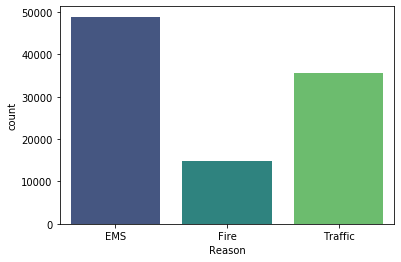

In [57]:
sns.countplot(x='Reason',data=df,palette='viridis')

##### 3-How many calls does 911 recieve during a month ?

##### First we will see a countplot of the Month column by the Reason column.

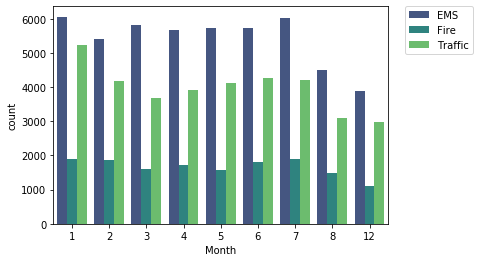

In [69]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Second the count of calls per month.

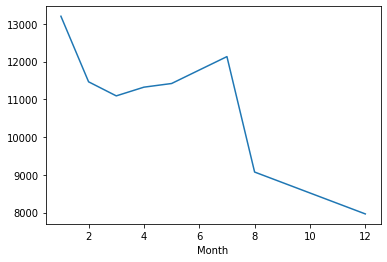

In [71]:
byMonth['twp'].plot()

### Conclusions

!(https://github.com/MariamRashad/911-Data-blog/blob/master/01fcc40d6b7564bcc9edd0d308bdfd68.jpg?raw=true)

*911 is one from the most Important and used methods to help rescue lifes .. <br>

*Every individual faces dangerous situations during their lifes that cannot be solved easily except by Resorting to someone who can help .

*And It's always preferred to be 911 in such situations ♥

*May all of us be safe and get away from falling into troubles ..